# 실습 내용

- 머신러닝 모델링을 위한 코딩은 무조건 할 수 있어야 합니다.
- 코딩 내용을 자세히 알지 못해도 무작정 코딩을 진행해봅니다.
- Titanic 데이터를 대상으로 모델링을 진행합니다.
- kNN 알고리즘을 사용합니다.
- 다양한 방법으로 모델 성능을 평가합니다.

# 1.환경 준비

- 기본 **라이브러리**와 대상 **데이터**를 가져와 이후 과정을 준비합니다.

In [236]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [237]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/titanic.csv'
data = pd.read_csv(path)

<img src = "https://github.com/Jangrae/img/blob/master/code_13.png?raw=true" width=700 align="left"/>

In [238]:
data['Title'] = data['Name'].str.extract('([A-Za-z]+)\.')
main_tit = ['Mr', 'Miss', 'Mrs','Master']

In [239]:
data.loc[data['Title'].isin(main_tit)== False, 'Title'] = 'Others'
# 타이틀이 아닌 사람들을 아더스로 바꿔랑

**1) 변수 제거**

- 분석에 의미가 없다고 판단되는 변수는 제거합니다.

In [240]:
# 제거 대상: PassengerId, Name, Ticket, Cabin
drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']

data.drop(drop, axis = 1 , inplace = True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


**2) 결측치 처리**

- 결측치가 있으면 제거하거나 적절한 값으로 채웁니다.

In [215]:
age_median = data.groupby(by='Title')['Age'].transform('median')

In [216]:
data['Age'].fillna(age_median, inplace=True)

In [217]:
# Age 결측치를 Title 별 중앙값으로 채우기

# age_median = data['Age'].median()
# data['Age'].fillna(age_mediane_median, inplace = True)

In [218]:
# Age 결측치를 Title 별 중앙값으로 채우기 방법2

data['Age'] = data['Age'].fillna(data['Age'].median())

In [219]:
data['Embarked'].value_counts().idxmax()
data['Embarked'].mode([0])

0    S
Name: Embarked, dtype: object

In [220]:
embarked_mode = data['Embarked'].mode().values[0]
data['Embarked'].fillna(embarked_mode, inplace=True)

**3) x, y 분리**

- 우선 target 변수를 명확히 지정합니다.
- target을 제외한 나머지 변수들 데이터는 x로 선언합니다.
- target 변수 데이터는 y로 선언합니다. 
- 이 결과로 만들어진 x는 데이터프레임, y는 시리즈가 됩니다.
- 이후 모든 작업은 x, y를 대상으로 진행합니다.

In [221]:
# target 확인

target = 'Survived'


# 데이터 분리
x = data.drop(target, axis = 1)
y = data.loc[:, target]

**4) 가변수화**

- 범주형 변수를 가변수화 합니다.

<img src = "https://github.com/Jangrae/img/blob/master/get_dummies1.png?raw=true" width=700 align="left"/>

In [222]:
#새로 생성되는 열중하나(맨앞)을 제거할 수 있다.
# rop_first = True로 설정하면 새로 생성되는 열 중 하나 (맨 앞)를 제거할 수 있습니다.
# 다중공선성 해결을 위한 옵션입니다.
# 성능이 좋아지고 안좋아지고는 **시도**해보지 않고는 알 수 없습니다.

<img src = "https://github.com/Jangrae/img/blob/master/get_dummies2.png?raw=true" width=700 align="left"/>

In [223]:
# 가변수화 대상: Pclass, Sex, Embarked
dum_col= ['Pclass','Sex','Embarked','Title']

x = pd.get_dummies(x, columns = dum_col, drop_first = True)# 다중공선성 제거

x

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,22.0,1,0,7.2500,0,1,1,0,1,0,1,0,0
1,38.0,1,0,71.2833,0,0,0,0,0,0,0,1,0
2,26.0,0,0,7.9250,0,1,0,0,1,1,0,0,0
3,35.0,1,0,53.1000,0,0,0,0,1,0,0,1,0
4,35.0,0,0,8.0500,0,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,1,0,1,0,1,0,0,0,1
887,19.0,0,0,30.0000,0,0,0,0,1,1,0,0,0
888,21.0,1,2,23.4500,0,1,0,0,1,1,0,0,0
889,26.0,0,0,30.0000,0,0,1,0,0,0,1,0,0


**5) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정합니다.

In [224]:
# 모듈 불러오기

# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) 
# 7:3으로 분리


# 4.모델링

- 본격적으로 모델을 **선언**하고 **학습**하고 **평가**하는 과정을 진행합니다.
- 우선 **회귀** 문제인지 **분류** 문제인지 명확히 구분합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_14.png?raw=true" width=700 align="left"/>

- 회귀 문제 인가요? 분류 문제인가요?
- 회귀인지 분류인지에 따라 사용할 알고리즘과 평가 방법이 달라집니다.
- 우선 다음 알고리즘을 사용합니다.
    - 알고리즘: KNeighborsClassifier

In [225]:

from sklearn.neighbors import KNeighborsClassifier

In [226]:
# 2단계: 선언하기
model = KNeighborsClassifier()

In [227]:
# 3단계: 학습하기
model.fit(x_train, y_train)

KNeighborsClassifier()

In [228]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

# 5.분류 성능 평가

- 다양한 성능 지표로 분류 모델 성능을 평가합니다.

**1) Confusion Matrix**

In [229]:
# 모듈 불러오기

from sklearn.metrics import confusion_matrix
# 성능 평가
print(confusion_matrix(y_test,y_pred))

[[126  27]
 [ 57  58]]


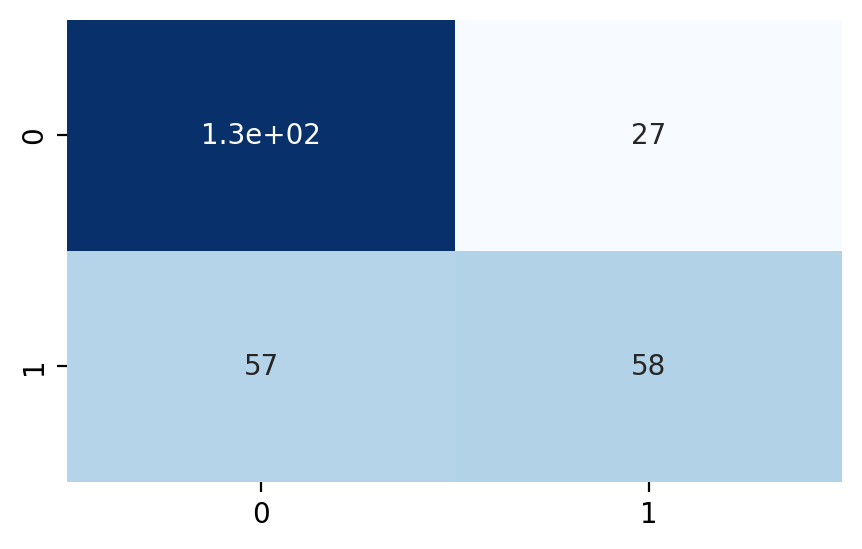

In [230]:
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred),
           annot = True,
           cbar = False,
           cmap = 'Blues',
           annot_kws={'size':10})
plt.show()

# e-1 --> 0.1 , 1/10
# e-2 --> 0.1 , 1/100
# e-2 --> 100
# 1.2e+02 --> 1.2 ** 10 --> 120


**2) Accuracy**

In [231]:
# 모듈 불러오기
from sklearn.metrics import accuracy_score
# 성능 평가
print(accuracy_score(y_test,y_pred))

0.6865671641791045


**3) Precision**

In [232]:
# 모듈 불러오기
from sklearn.metrics import precision_score


# 성능 평가
print(precision_score(y_test,y_pred))
print(precision_score(y_test,y_pred, average='binary')) # 디폴트값 위랑 같음

print(precision_score(y_test,y_pred, average=None)) # 두게다 보고 싶을때

print(precision_score(y_test,y_pred, average='macro')) # 
print(precision_score(y_test,y_pred, average='weighted')) # 가중평균


0.6823529411764706
0.6823529411764706
[0.68852459 0.68235294]
0.6854387656702026
0.6858763079491644


**4) Recall**

In [233]:
# 모듈 불러오기
from sklearn.metrics import recall_score

# 성능 평가
print(recall_score(y_test,y_pred))

0.5043478260869565


**5) F1-Score**

In [234]:
# 모듈 불러오기
from sklearn.metrics import f1_score


# 성능 평가
print(f1_score(y_test,y_pred))

0.58


**6) Classification Report**

In [235]:
# 모듈 불러오기
from sklearn.metrics import classification_report

# 성능 평가
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75       153
           1       0.68      0.50      0.58       115

    accuracy                           0.69       268
   macro avg       0.69      0.66      0.66       268
weighted avg       0.69      0.69      0.68       268

